<a href="https://colab.research.google.com/github/mohitx84/Baking-Client-Retention-Model/blob/main/Banking_Client_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Catboost

In [ ]:
pip install catboost

**Importing Required Functions**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report

Reading dataset


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Checking duplicate values

In [ ]:
df.duplicated().sum()

np.int64(0)

Checking missing values

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


Checking outliers values


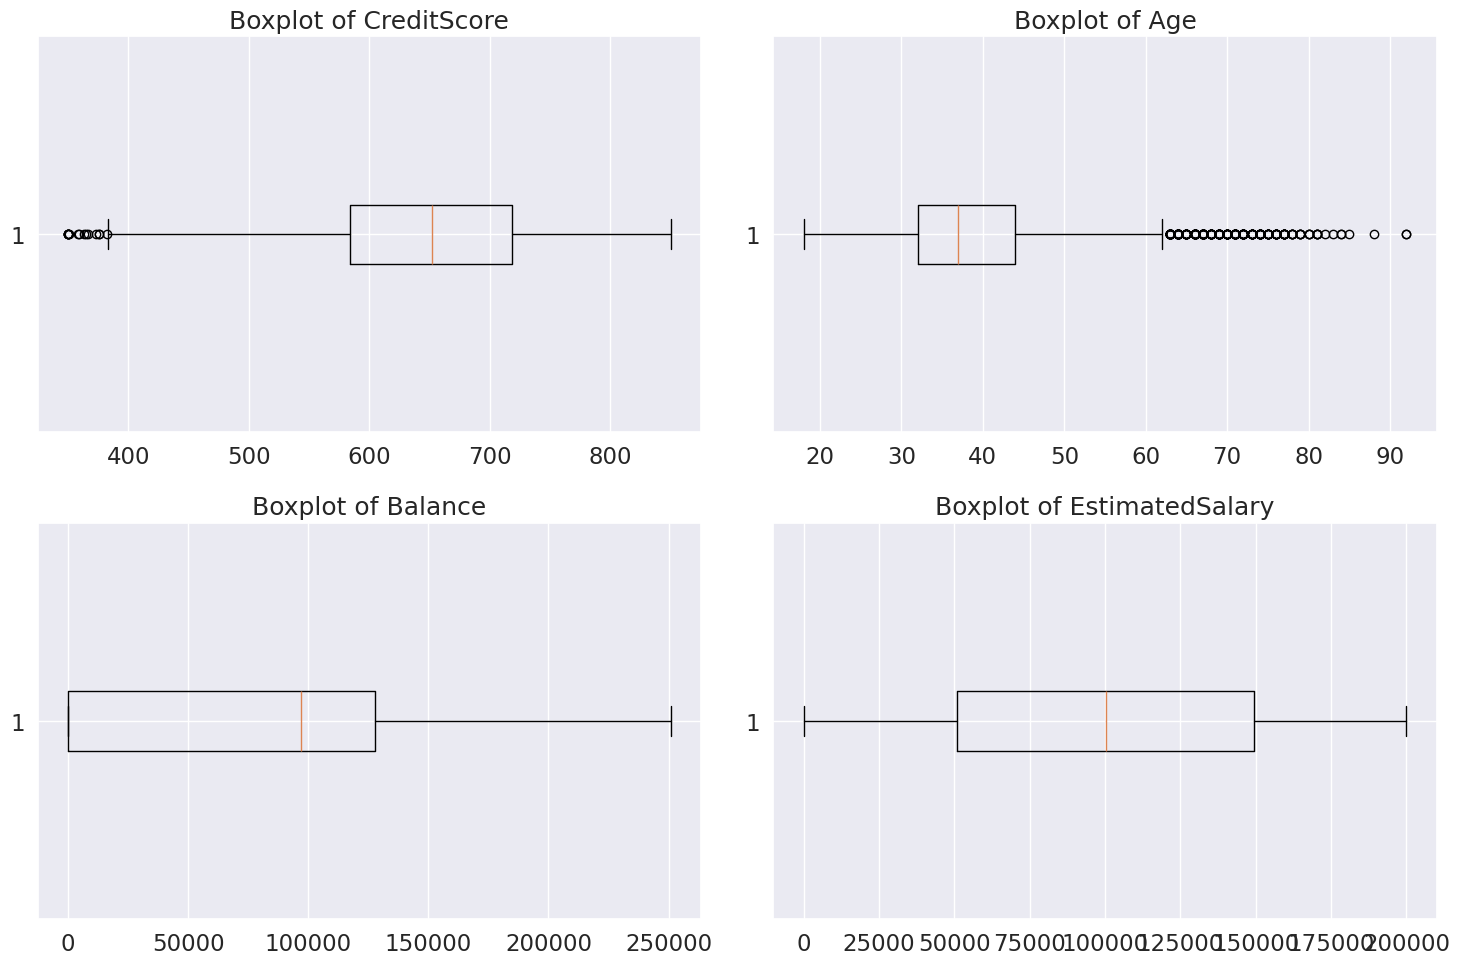

In [ ]:
# Features to check for outliers
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Create box plots for each feature to visually inspect outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

**APPLYING EDA**

Univariate Analysis



CreditScore Column


In [ ]:
df['CreditScore'].describe()

,CreditScore
count,10000.000000
mean,650.528800
std,96.653299
min,350.000000
25%,584.000000
50%,652.000000
75%,718.000000
max,850.000000


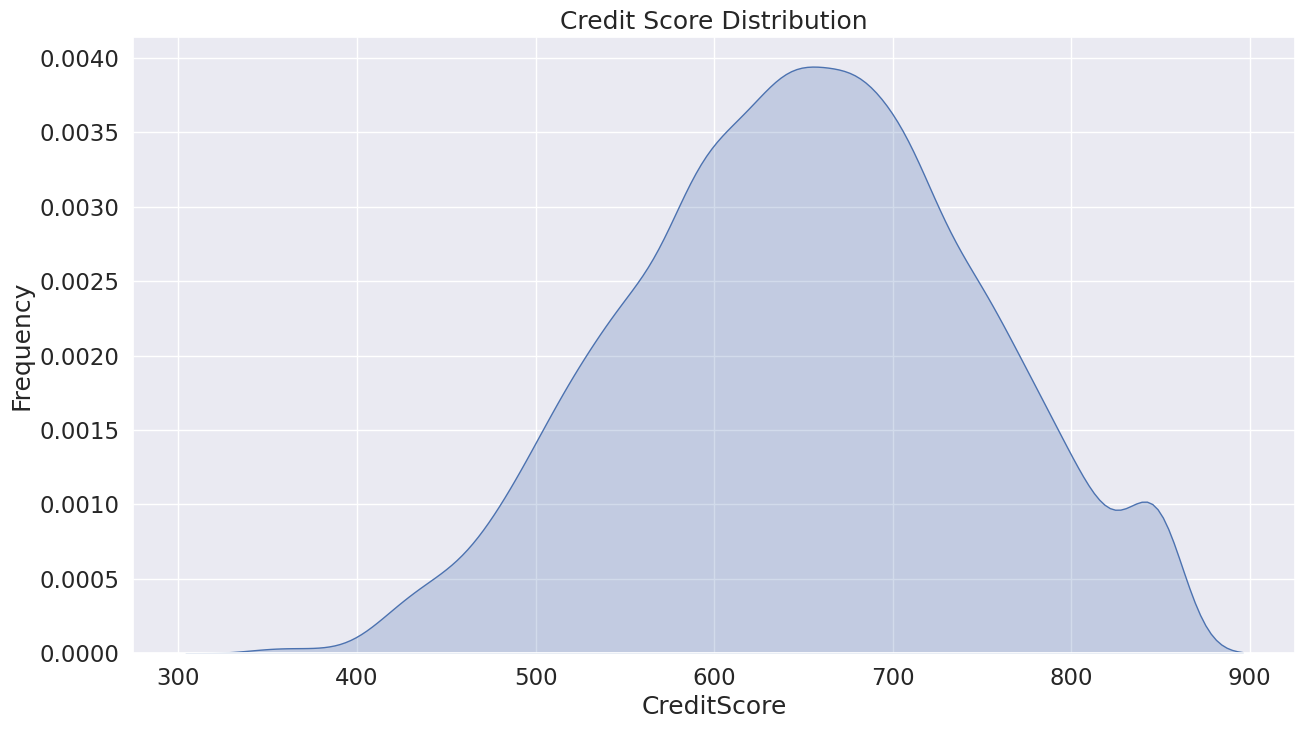

In [ ]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['CreditScore'], fill=True, palette="Set2")
plt.title('Credit Score Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

plt.show()


Geography column

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


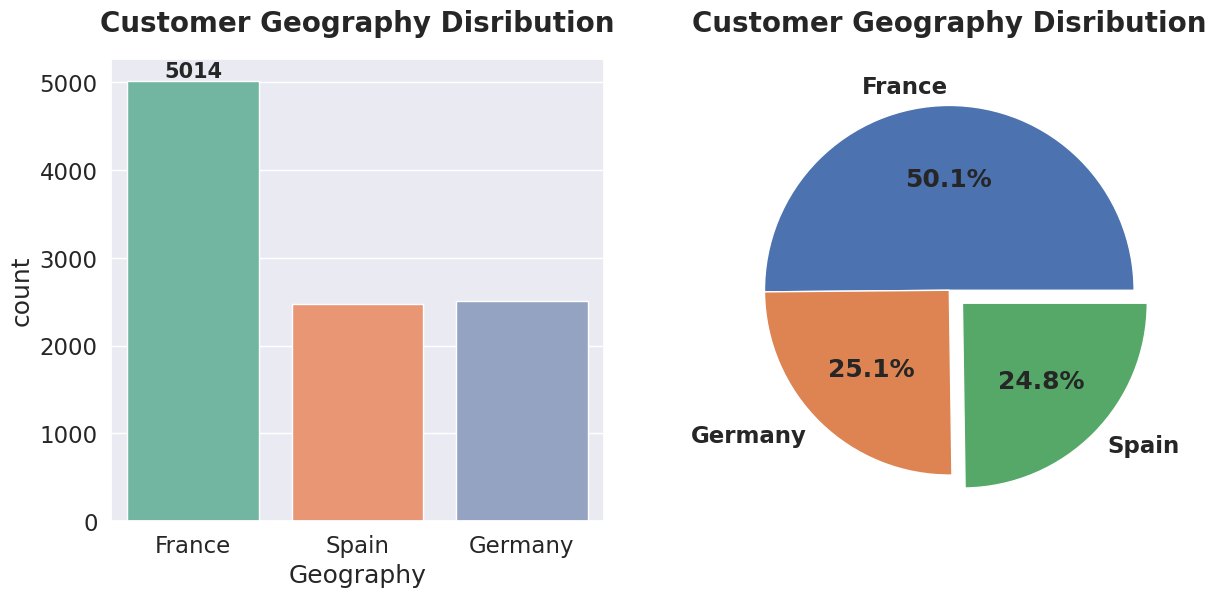

In [ ]:
count = df["Geography"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Geography",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0,0.1])
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)
plt.show()

Gender column

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


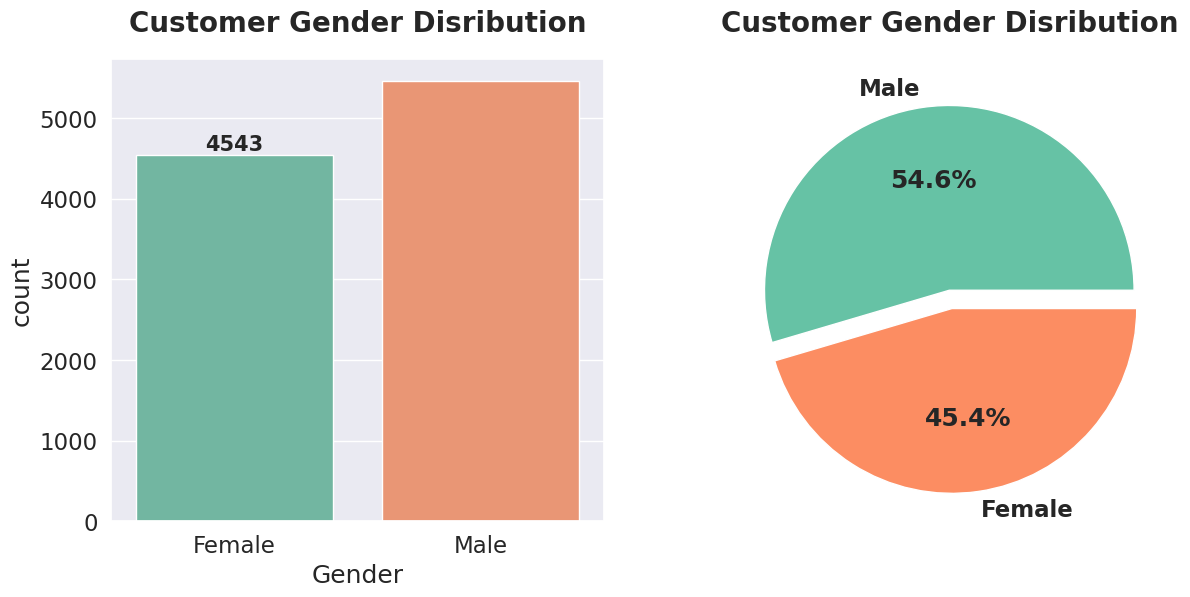

In [ ]:
count = df["Gender"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Gender",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)
plt.show()

Age column

In [ ]:
df['Age'].describe()

,Age
count,10000.000000
mean,38.921800
std,10.487806
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


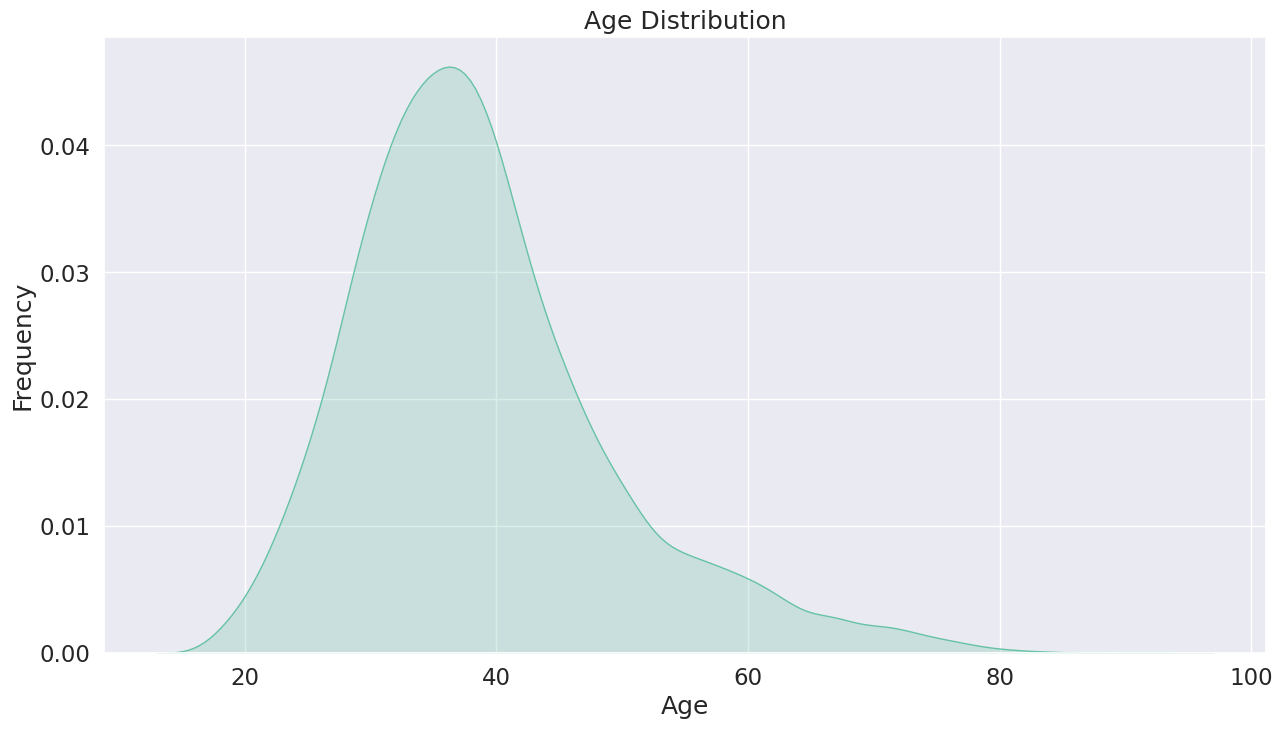

In [ ]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['Age'], fill=True, palette="Set2")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Tenure Column

In [ ]:
df['Tenure'].value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


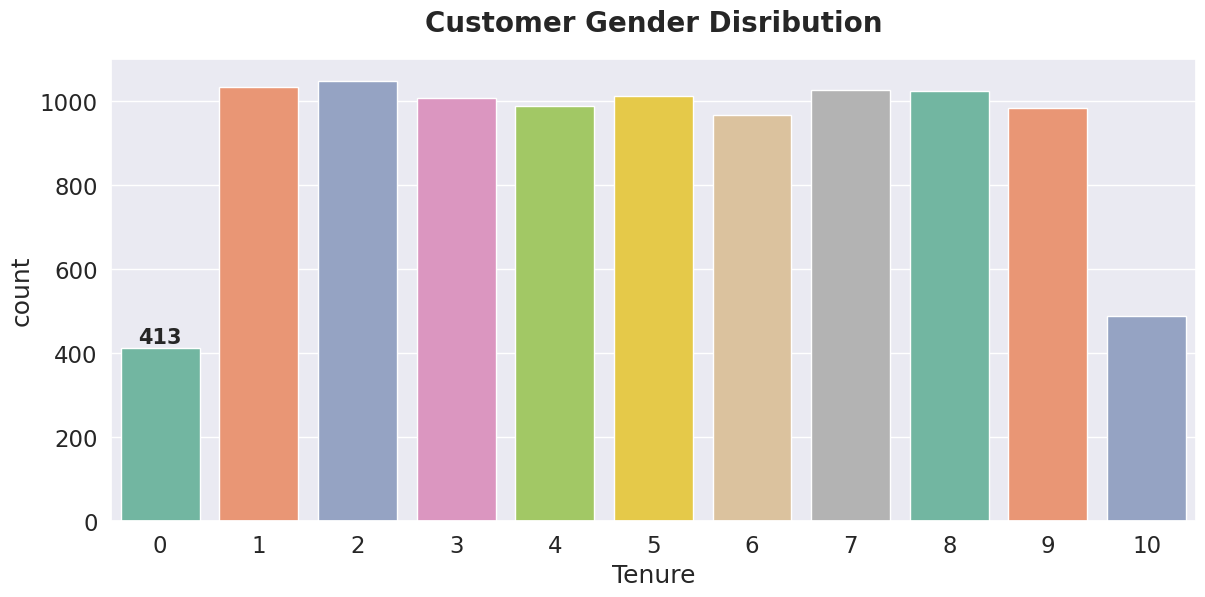

In [ ]:
plt.figure(figsize=(14,6))

ax=sns.countplot(data=df, x="Tenure",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.show()

Balance Column

In [ ]:
df['Balance'].describe()

,Balance
count,10000.000000
mean,76485.889288
std,62397.405202
min,0.000000
25%,0.000000
50%,97198.540000
75%,127644.240000
max,250898.090000


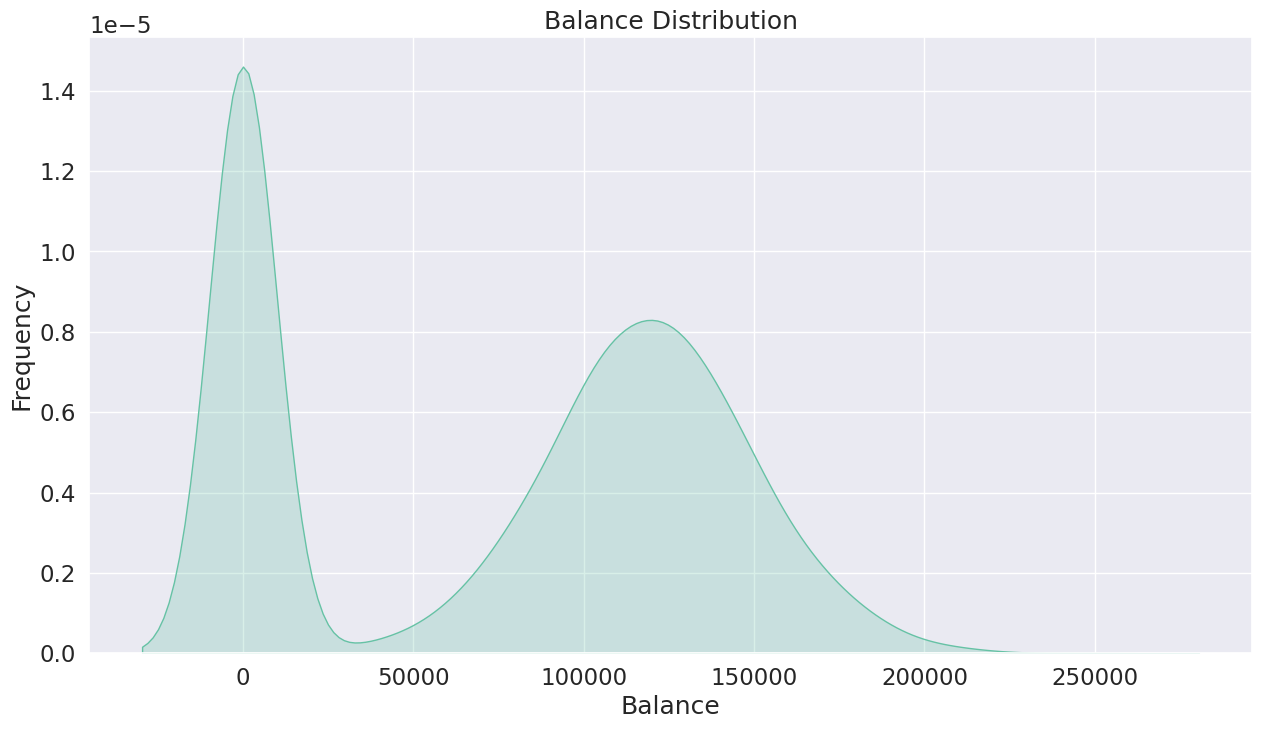

In [ ]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['Balance'], fill=True, palette="Set2")
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.show()

NumOfProducts Column

In [ ]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


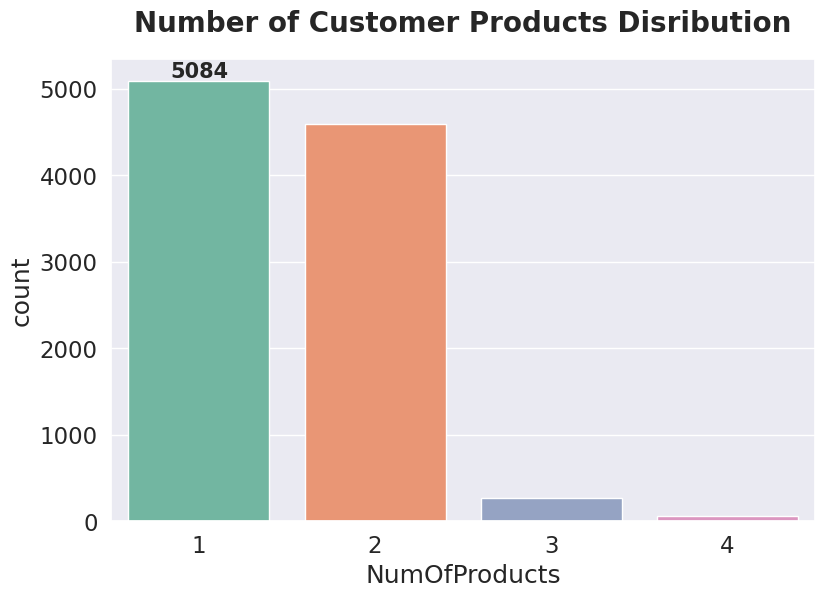

In [ ]:
count = df["NumOfProducts"].value_counts()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="NumOfProducts",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Number of Customer Products Disribution",fontweight="black",size=20,pad=20)

plt.show()

HascrCard column

In [ ]:
df['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


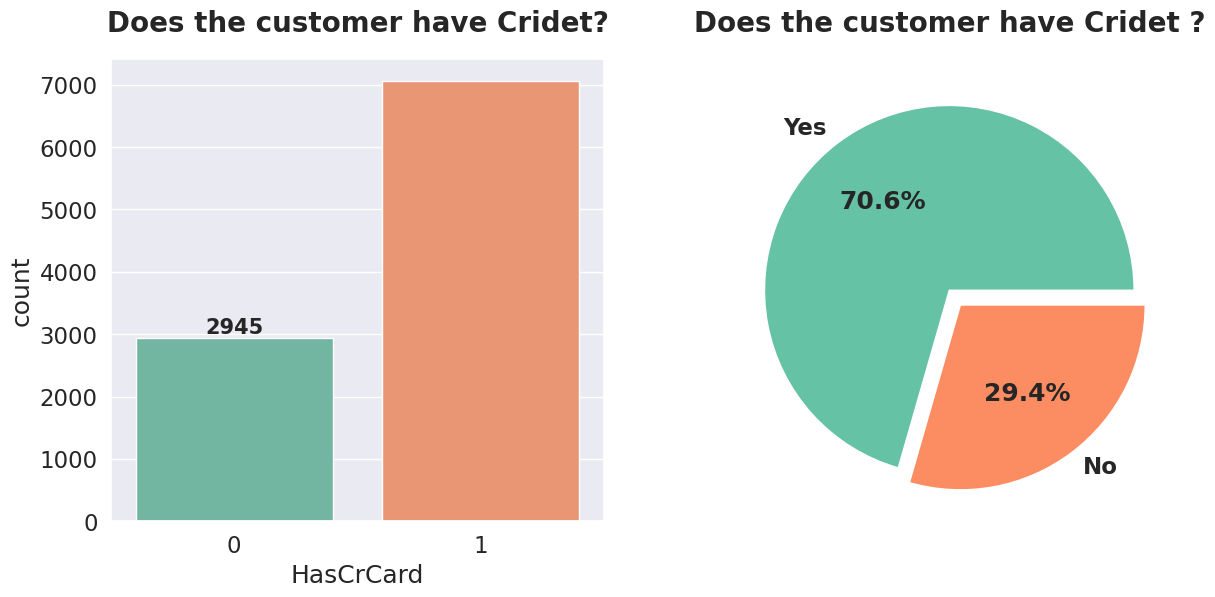

In [ ]:
count = df["HasCrCard"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="HasCrCard",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Does the customer have Cridet?",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['Yes', 'No'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Does the customer have Cridet ?",fontweight="black",size=20,pad=20)
plt.show()


IsActiveMember Column


In [ ]:
df['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


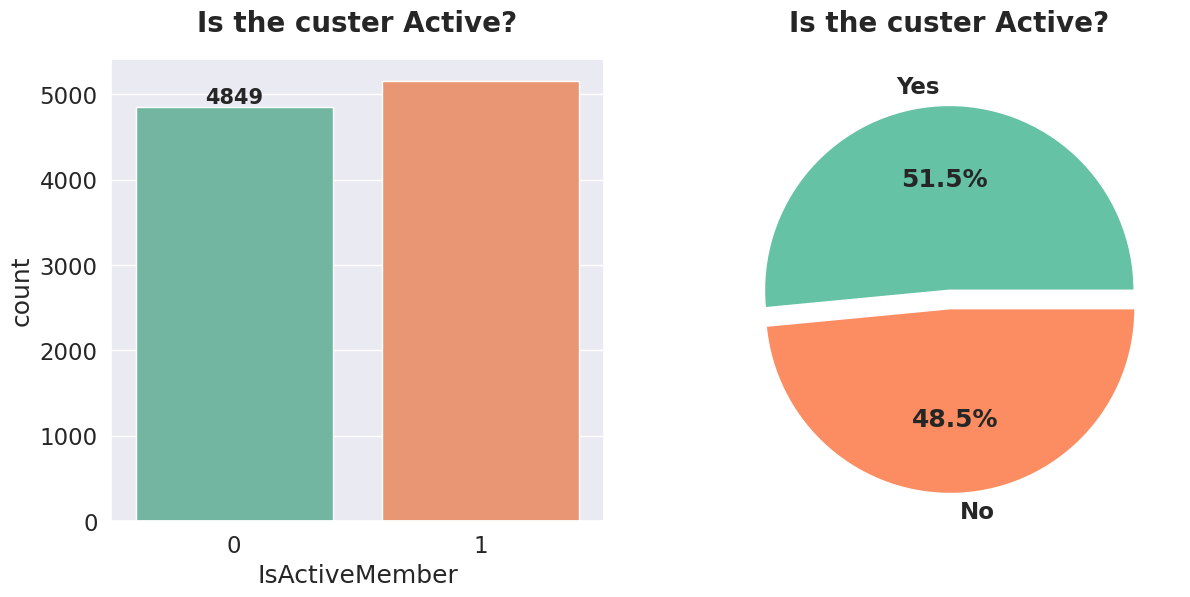

In [ ]:
count = df["IsActiveMember"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="IsActiveMember",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Is the custer Active?",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['Yes', 'No'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Is the custer Active?",fontweight="black",size=20,pad=20)
plt.show()

Estimated Salary Column

In [ ]:
df['EstimatedSalary'].describe()

,EstimatedSalary
count,10000.000000
mean,100090.239881
std,57510.492818
min,11.580000
25%,51002.110000
50%,100193.915000
75%,149388.247500
max,199992.480000


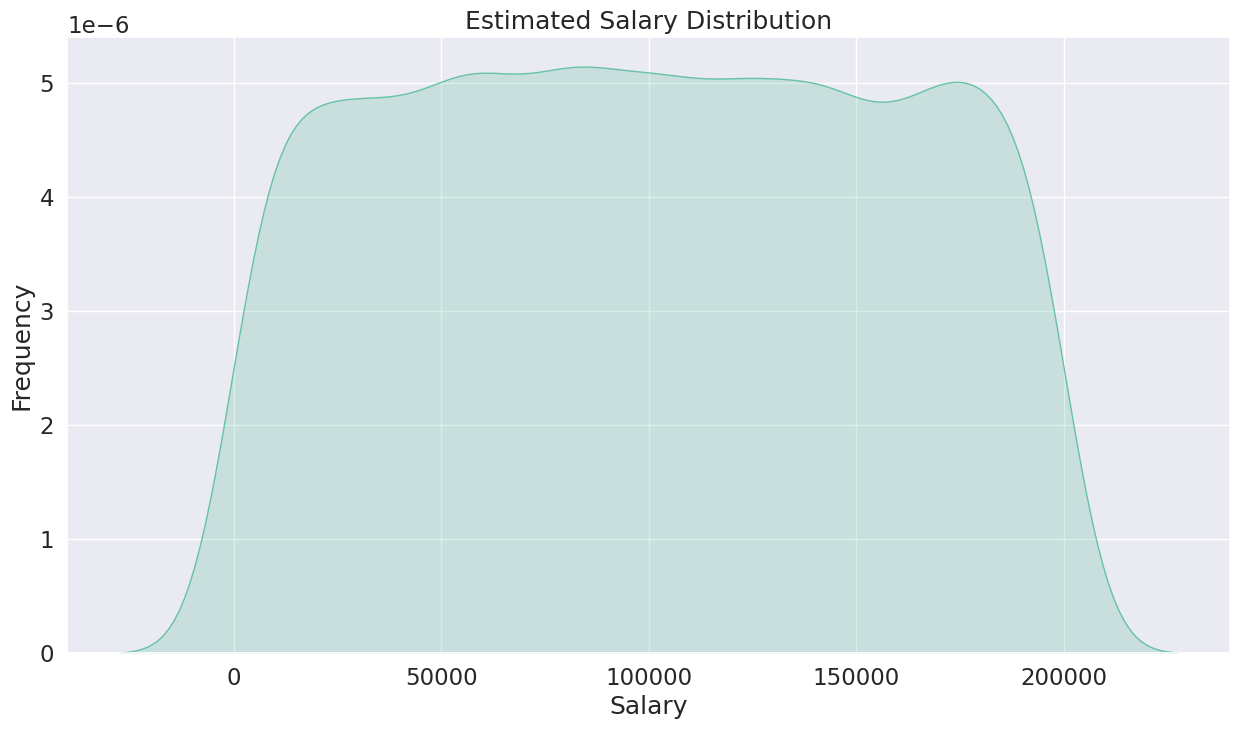

In [ ]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['EstimatedSalary'], fill=True, palette="Set2")
plt.title('Estimated Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

Exited Column

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


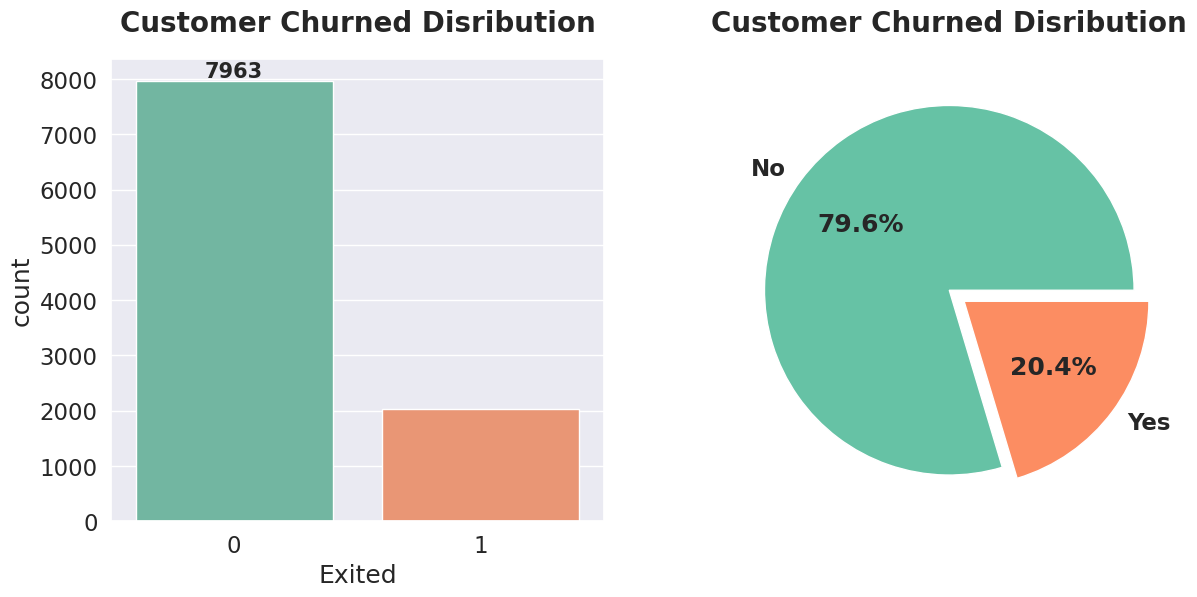

In [ ]:
count = df["Exited"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Exited",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['No', 'Yes'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

Bivariate Analysis

Numerical Features vs. Churn (Exited)

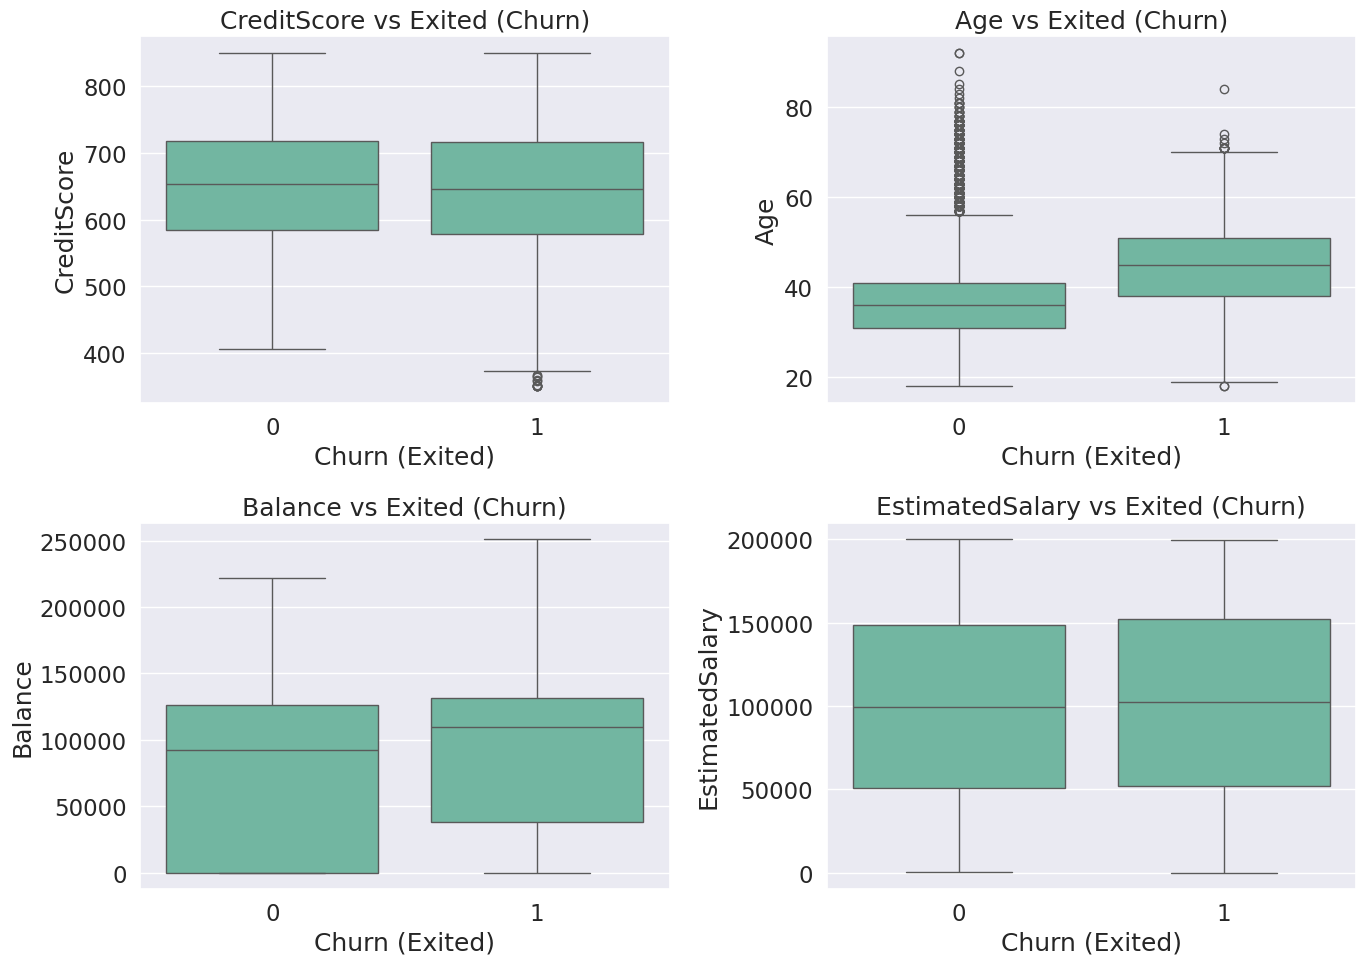

In [ ]:
# List of numerical features to analyze
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Plotting the relationship between each numerical feature and churn (Exited)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel('Churn (Exited)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Categorical Features vs. Churn (Exited)

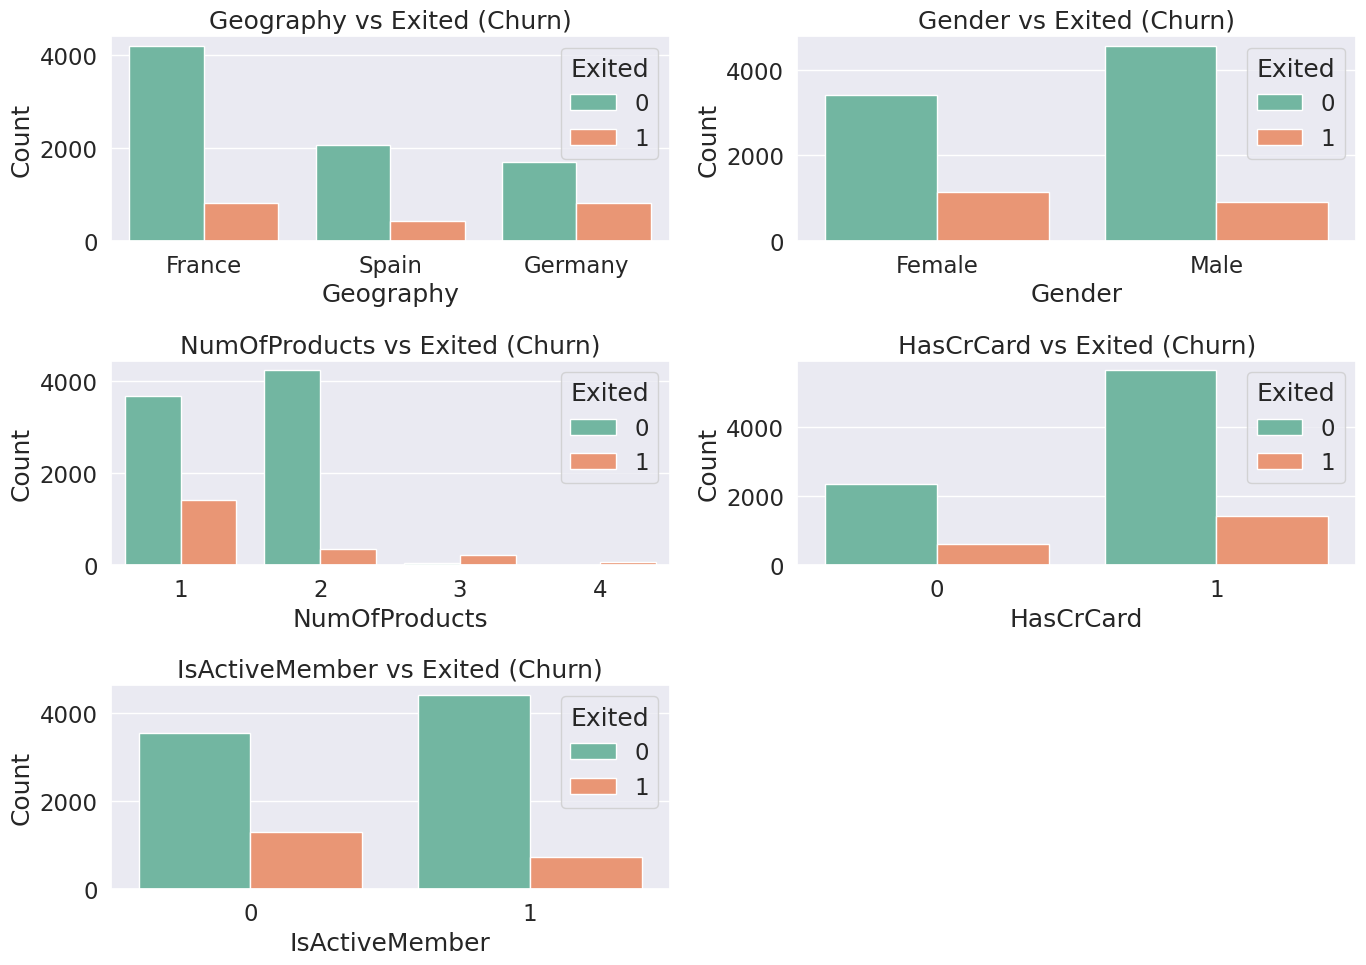

In [ ]:
# List of categorical features to analyze
categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Plotting the relationship between each categorical feature and churn (Exited)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Multivariate Analysis

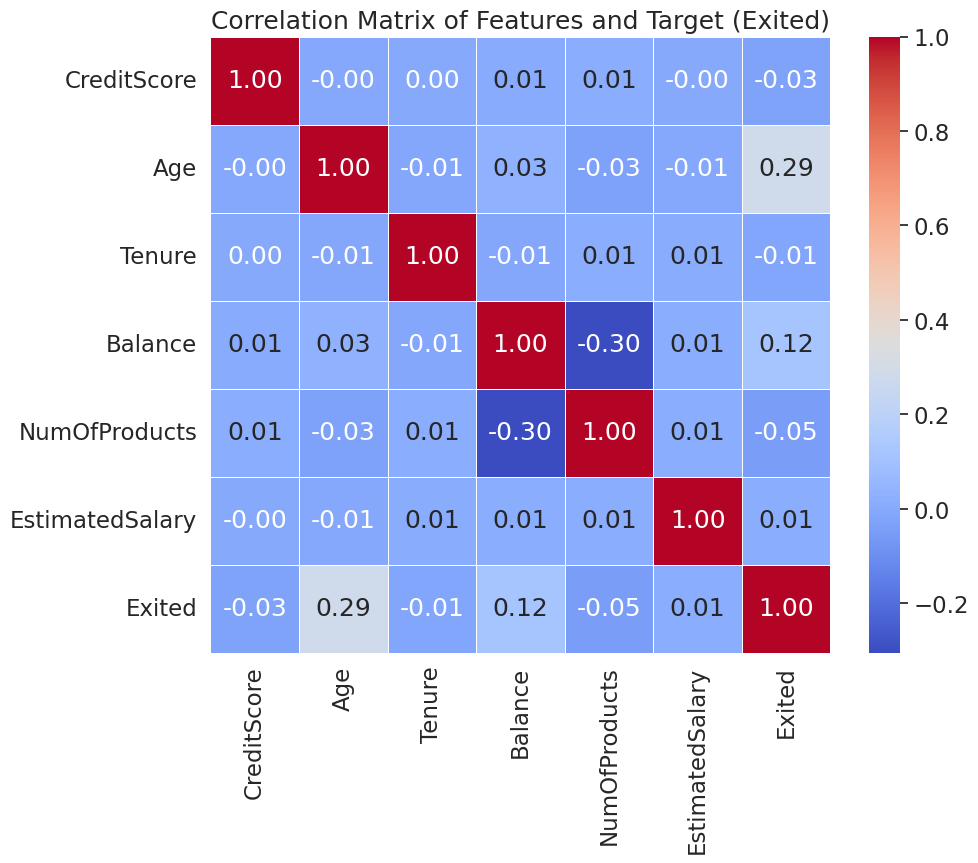

In [ ]:
# Include the target 'Exited' and numerical features for correlation analysis
numerical_features_with_target = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

# Compute the correlation matrix
correlation_matrix = df[numerical_features_with_target].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Target (Exited)')
plt.show()

**Data Preprocessing**

Drop Column that are not needed


In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

Define Features X and Target Y

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Data Encoding

To apply encoding to categorical columns in your dataset, the type of encoding will depend on whether the categorical variables are nominal (unordered) or ordinal (ordered)

In [ ]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=False)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


Data Scaling

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

Data splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data Balancing

We can apply SMOTE model to balance the data

In [ ]:
# Step 1: Initialize SMOTE
smote = SMOTE(random_state=42)

# Step 2: Apply SMOTE only on training data (never on test set!)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 3: Confirm balanced shapes
print("Resampled X_train shape:", X_train.shape)
print("Resampled y_train shape:", y_train.shape)


Resampled X_train shape: (12712, 13)
Resampled y_train shape: (12712,)


**Machine Learning Models**

Linear logistic Model

In [ ]:
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# Train the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Train Score
print(lr.score(X_train, y_train))

0.7347388294524858


In [ ]:
# Test Score
print(lr.score(X_test, y_test))

0.739


In [ ]:
# Make predictions on the test set
y_pred = lr.predict(X_test)
# Get our metrics
lr_acc = accuracy_score(y_test, y_pred)
lr_per = precision_score(y_test, y_pred)
lr_rec = recall_score(y_test, y_pred)

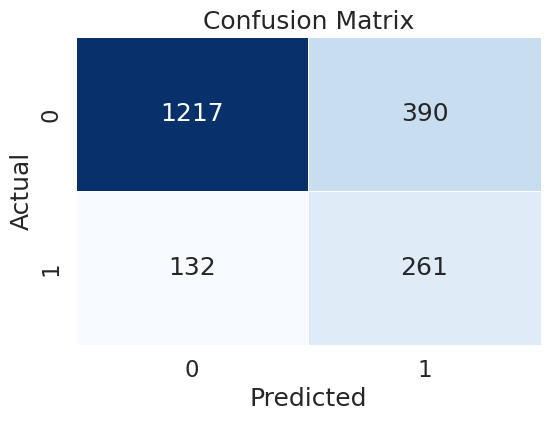

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

K-Neighbors Classifiers

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(knn.score(X_train, y_train))

0.9323473882945249


In [ ]:
print(knn.score(X_test, y_test))

0.7705


In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
# Get our metrics
knn_acc = accuracy_score(y_test, y_pred)
knn_per = precision_score(y_test, y_pred)
knn_rec = recall_score(y_test, y_pred)

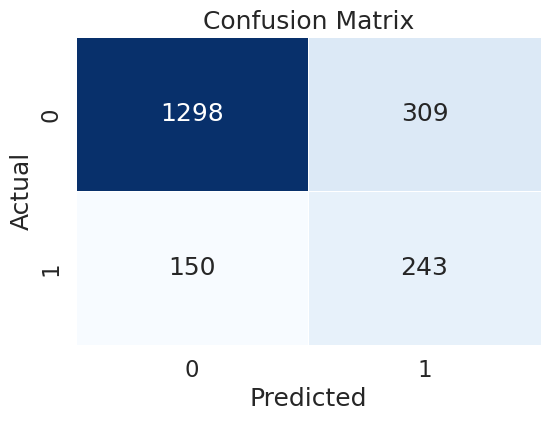

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01, random_state=42)

# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01, random_state=42)

In [ ]:
# Train Score
print(clf.score(X_train, y_train))

0.7178256765261171


In [ ]:
# Test Score
print(clf.score(X_test, y_test))

0.743


In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Get our metrics
clf_acc = accuracy_score(y_test, y_pred)
clf_per = precision_score(y_test, y_pred)
clf_rec = recall_score(y_test, y_pred)

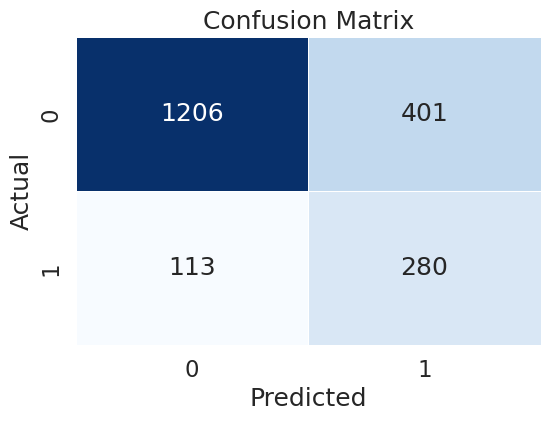

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

RandomForestClassifier Model

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators=100, min_impurity_decrease=0.01)

RF_classifier.fit(X_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.01)

In [ ]:
# Train score
RF_classifier.score(X_train, y_train)

0.7672278162366268

In [ ]:
# Test score
RF_classifier.score(X_test, y_test)

0.767

In [ ]:
# Get prediction
y_pred = RF_classifier.predict(X_test)

In [ ]:
# Get our metrics
rf_acc = accuracy_score(y_test, y_pred)
rf_per = precision_score(y_test, y_pred)
rf_rec = recall_score(y_test, y_pred)

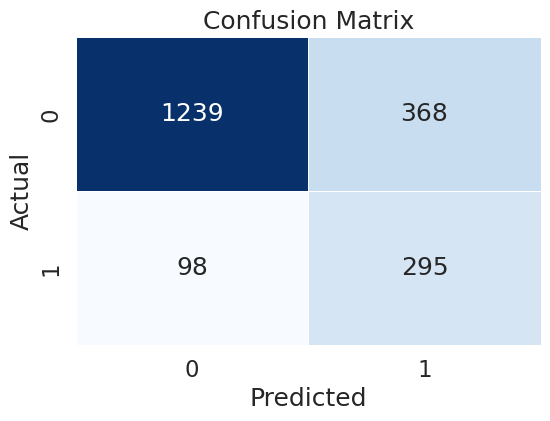

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XGBClassifier Model

In [ ]:
# Create XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=200)

XGB_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Train score
XGB_classifier.score(X_train, y_train)

0.9907960981749528

In [ ]:
# Test score
XGB_classifier.score(X_test, y_test)

0.85

In [ ]:
# Get prediction
y_pred_xgb = XGB_classifier.predict(X_test)

In [ ]:
# Get our metrics
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_per = precision_score(y_test, y_pred_xgb)
xgb_rec = recall_score(y_test, y_pred_xgb)

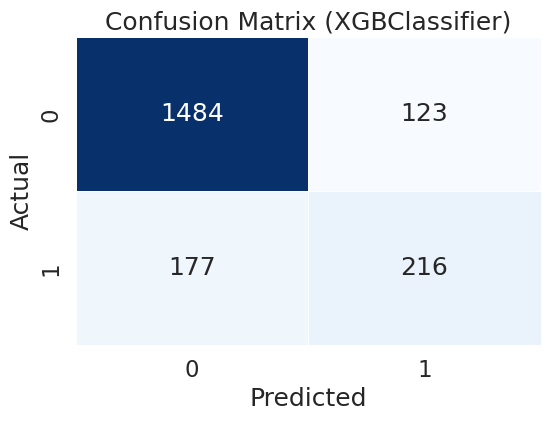

In [ ]:
# Create a confusion matrix for XGBClassifier
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (XGBClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

CatBoostClassifier

In [ ]:
# Create CatBoostClassifier Model
CatBoost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

CatBoost_classifier.fit(X_train, y_train)

0:	learn: 0.6558281	total: 74ms	remaining: 7.33s
1:	learn: 0.6255101	total: 84.5ms	remaining: 4.14s
2:	learn: 0.5982136	total: 89ms	remaining: 2.88s
3:	learn: 0.5770468	total: 92.8ms	remaining: 2.23s
4:	learn: 0.5574047	total: 108ms	remaining: 2.06s
5:	learn: 0.5409074	total: 132ms	remaining: 2.07s
6:	learn: 0.5286027	total: 147ms	remaining: 1.95s
7:	learn: 0.5175866	total: 200ms	remaining: 2.3s
8:	learn: 0.5075539	total: 219ms	remaining: 2.21s
9:	learn: 0.4978897	total: 225ms	remaining: 2.03s
10:	learn: 0.4893607	total: 244ms	remaining: 1.97s
11:	learn: 0.4823758	total: 261ms	remaining: 1.91s
12:	learn: 0.4765073	total: 282ms	remaining: 1.89s
13:	learn: 0.4699201	total: 312ms	remaining: 1.92s
14:	learn: 0.4641557	total: 330ms	remaining: 1.87s
15:	learn: 0.4591025	total: 354ms	remaining: 1.86s
16:	learn: 0.4556528	total: 377ms	remaining: 1.84s
17:	learn: 0.4506461	total: 405ms	remaining: 1.84s
18:	learn: 0.4472239	total: 421ms	remaining: 1.79s
19:	learn: 0.4445149	total: 446ms	remainin

In [ ]:
# Train score
CatBoost_classifier.score(X_train, y_train)

np.float64(0.8654027690371303)

In [ ]:
# Test score
CatBoost_classifier.score(X_test, y_test)

np.float64(0.8415)

In [ ]:
# Get prediction
y_pred_catboost = CatBoost_classifier.predict(X_test)

In [ ]:
# Get our metrics
cat_acc = accuracy_score(y_test, y_pred_catboost)
cat_per = precision_score(y_test, y_pred_catboost)
cat_rec = recall_score(y_test, y_pred_catboost)

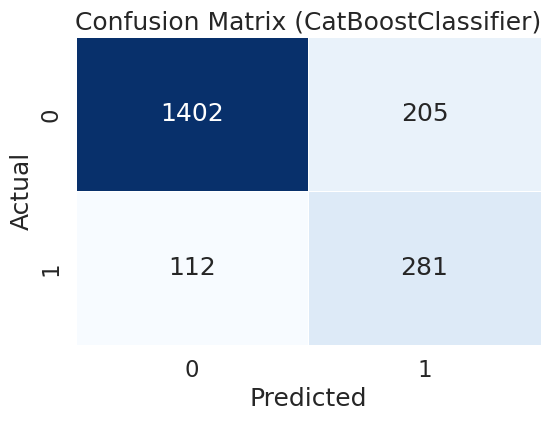

In [ ]:
# Create a confusion matrix for CatBoostClassifier
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_catboost, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (CatBoostClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluation

In [ ]:

Models = ['LogisticRegression',  'KNN', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBoostClassifier', 'CatBoostClassifier', ]
Accuracy = [lr_acc,  knn_acc, clf_acc, rf_acc,  xgb_acc, cat_acc ]
Precision = [lr_per, knn_per, clf_per, rf_per, xgb_per,  cat_per]
Recall = [lr_rec,  knn_rec, clf_rec, rf_rec,  xgb_rec, cat_rec]
Models = pd.DataFrame(data={'Models': Models,'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall})
Models


,Models,Accuracy,Precision,Recall
0,LogisticRegression,0.7390,0.400922,0.664122
1,KNN,0.7705,0.440217,0.618321
2,DecisionTreeClassifier,0.7430,0.411160,0.712468
3,RandomForestClassifier,0.7670,0.444947,0.750636
4,XGBoostClassifier,0.8500,0.637168,0.549618
5,CatBoostClassifier,0.8415,0.578189,0.715013
